In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-set-bart/sample_submission.csv
/kaggle/input/data-set-bart/test_labels.csv
/kaggle/input/data-set-bart/train.csv
/kaggle/input/data-set-bart/test.csv


In [7]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
import spacy


In [8]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
train_data = pd.read_csv('D:/jigsaw-toxic-comment-classification-challenge/train.csv')
test_data = pd.read_csv('D:/jigsaw-toxic-comment-classification-challenge/test.csv')
test_labels_data = pd.read_csv('D:/jigsaw-toxic-comment-classification-challenge/test_labels.csv')


In [10]:
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    try:
        tokens = word_tokenize(text.lower())
    except:
        tokens = [token.text.lower() for token in nlp(text)]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [11]:
train_data['cleaned_comment_text'] = train_data['comment_text'].apply(preprocess_text)


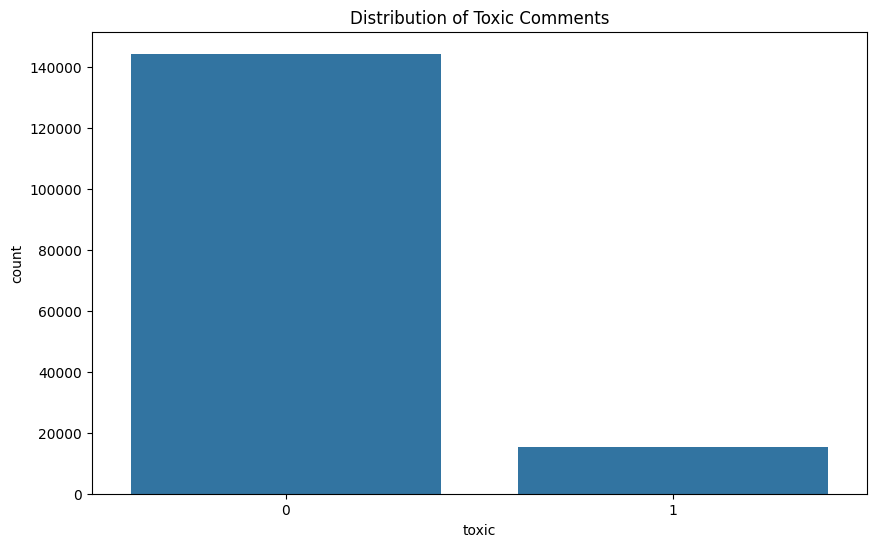

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="toxic")
plt.title("Distribution of Toxic Comments")
plt.show()


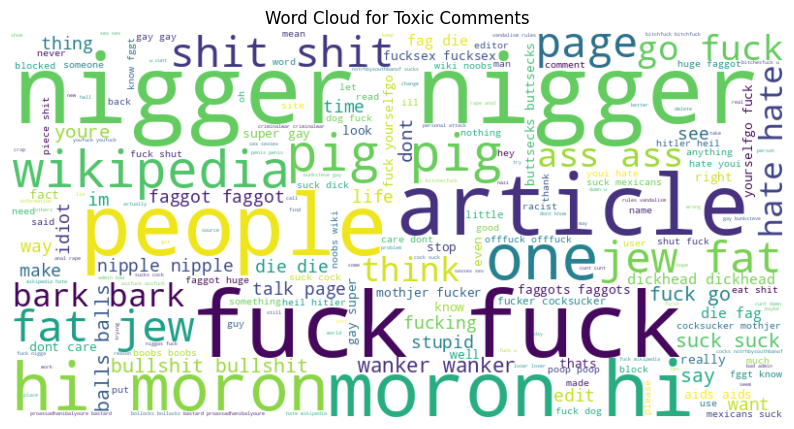

In [13]:
toxic_comments = " ".join(train_data[train_data['toxic'] == 1]['cleaned_comment_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Toxic Comments")
plt.show()



🔁 Applying SMOTE and training models:


100%|██████████| 6/6 [01:11<00:00, 11.88s/it]



📊 Validation Results:

— toxic —
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     28859
           1       0.52      0.85      0.64      3056

    accuracy                           0.91     31915
   macro avg       0.75      0.88      0.80     31915
weighted avg       0.94      0.91      0.92     31915

ROC AUC: 0.9496

— severe_toxic —
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     31594
           1       0.25      0.82      0.38       321

    accuracy                           0.97     31915
   macro avg       0.62      0.90      0.68     31915
weighted avg       0.99      0.97      0.98     31915

ROC AUC: 0.9724

— obscene —
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     30200
           1       0.50      0.88      0.64      1715

    accuracy                           0.95     31915
   macro avg       0.75      0.

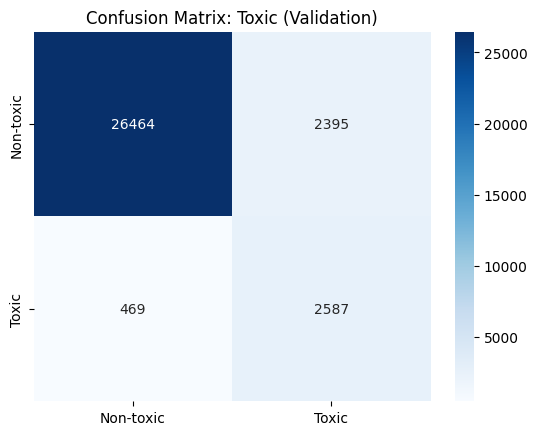


🧪 Test Results:

— toxic —
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     57888
           1       0.35      0.93      0.50      6090

    accuracy                           0.83     63978
   macro avg       0.67      0.87      0.70     63978
weighted avg       0.93      0.83      0.86     63978

ROC AUC: 0.9503

— severe_toxic —
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     63611
           1       0.09      0.87      0.17       367

    accuracy                           0.95     63978
   macro avg       0.55      0.91      0.57     63978
weighted avg       0.99      0.95      0.97     63978

ROC AUC: 0.9679

— obscene —
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     60287
           1       0.30      0.91      0.46      3691

    accuracy                           0.87     63978
   macro avg       0.65      0.89    

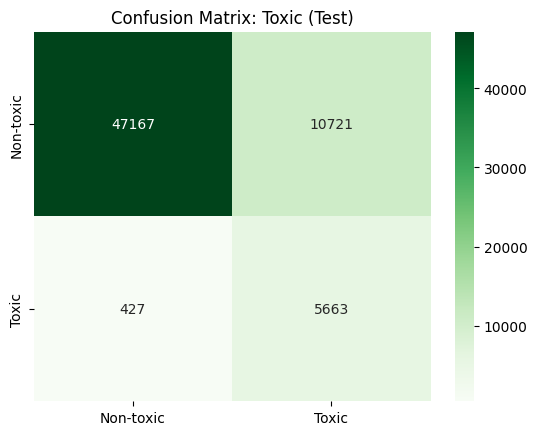

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 1) LOAD & PREPROCESS TRAINING DATA
df = pd.read_csv("train.csv")
df= pd.read_csv('labeled_data.csv')
df['comment_text'] = df['comment_text'].fillna("")
X = df['comment_text']
y = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

# 2) SPLIT INTO TRAIN / VALIDATION
X_train_text, X_val_text, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) TF‑IDF VECTORIZATION
vectorizer   = TfidfVectorizer(max_features=50000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_val_tfidf   = vectorizer.transform(X_val_text)

# 4) TRAIN LOGISTIC REGRESSION WITH SMOTE FOR EACH LABEL
models = {}
print("\n🔁 Applying SMOTE and training models:")
for label in tqdm(y.columns):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_tfidf, y_train[label])
    clf = LogisticRegression(class_weight='balanced', max_iter=1000)
    clf.fit(X_res, y_res)
    models[label] = clf

# 5) EVALUATE ON VALIDATION SET
print("\n📊 Validation Results:")
for label in y.columns:
    clf    = models[label]
    y_true = y_val[label]
    y_pred = clf.predict(X_val_tfidf)
    y_prob = clf.predict_proba(X_val_tfidf)[:,1]

    print(f"\n— {label} —")
    print(classification_report(y_true, y_pred, zero_division=0))
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")

# Optional: visualize confusion matrix for 'toxic'
cm_val = confusion_matrix(y_val['toxic'], models['toxic'].predict(X_val_tfidf))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-toxic","Toxic"], yticklabels=["Non-toxic","Toxic"])
plt.title("Confusion Matrix: Toxic (Validation)")
plt.show()

# 6) LOAD & PREPROCESS TEST DATA
test_df      = pd.read_csv("D:/jigsaw-toxic-comment-classification-challenge/test.csv")
test_labels  = pd.read_csv("D:/jigsaw-toxic-comment-classification-challenge/test_labels.csv")

# FILTER OUT UNLABELED ROWS (labels == -1)
valid_mask = (test_labels[['toxic','severe_toxic','obscene','threat','insult','identity_hate']] != -1).all(axis=1)
test_labels = test_labels.loc[valid_mask].set_index('id')
test_df     = test_df.set_index('id').loc[test_labels.index]
X_test_tfidf = vectorizer.transform(test_df['comment_text'].fillna(""))

# 7) EVALUATE ON TEST SET
print("\n🧪 Test Results:")
for label in y.columns:
    clf    = models[label]
    y_true = test_labels[label]
    y_pred = clf.predict(X_test_tfidf)
    y_prob = clf.predict_proba(X_test_tfidf)[:,1]

    print(f"\n— {label} —")
    print(classification_report(y_true, y_pred, zero_division=0))
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")

# Optional: visualize confusion matrix for 'toxic' on test
cm_test = confusion_matrix(test_labels['toxic'], models['toxic'].predict(X_test_tfidf))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Non-toxic","Toxic"], yticklabels=["Non-toxic","Toxic"])
plt.title("Confusion Matrix: Toxic (Test)")
plt.show()


In [ ]:
# ============================
# STEP 1: TRAINING THE MODEL
# ============================

import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import torch.nn.functional as F
import warnings

warnings.filterwarnings("ignore")

# Load and preprocess data
train_df = pd.read_csv("/kaggle/input/data-set-bart/train.csv")
labeled_data = pd.read_csv("/kaggle/input/data-set-bart/labeled_data.csv")
train_df = train_df.fillna("")
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
x_texts = train_df['comment_text'].values
y_labels = train_df[labels].values
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(x.split()))
metadata = train_df[['comment_length']].values

# Tokenizer
MAX_LEN = 128
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Dataset class
class ToxicDataset(Dataset):
    def __init__(self, texts, labels, metadata):
        self.texts = texts
        self.labels = labels
        self.metadata = metadata

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = torch.FloatTensor(self.labels[idx])
        metadata = torch.FloatTensor(self.metadata[idx])
        inputs = tokenizer(text, padding='max_length', truncation=True, max_length=MAX_LEN, return_tensors="pt")
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': label,
            'metadata': metadata
        }

# Train-validation split
X_train, X_val, y_train, y_val, metadata_train, metadata_val = train_test_split(
    x_texts, y_labels, metadata, test_size=0.2, random_state=42)

train_ds = ToxicDataset(X_train, y_train, metadata_train)
val_ds = ToxicDataset(X_val, y_val, metadata_val)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

# Model definition
class ToxicModel(nn.Module):
    def __init__(self, num_labels, hidden_size=256):
        super(ToxicModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(self.bert.config.hidden_size, hidden_size, batch_first=True, bidirectional=True)
        self.metadata_fc = nn.Linear(1, 32)
        self.fc = nn.Linear(hidden_size * 2 + 32, 256)
        self.output = nn.Linear(256, num_labels)

    def forward(self, input_ids, attention_mask, metadata):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_input = bert_output.last_hidden_state
        lstm_output, _ = self.lstm(lstm_input)
        lstm_output = lstm_output[:, -1, :]
        metadata_output = self.metadata_fc(metadata)
        combined_output = torch.cat((lstm_output, metadata_output), dim=1)
        fc_output = F.relu(self.fc(combined_output))
        output = torch.sigmoid(self.output(fc_output))
        return output

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ToxicModel(num_labels=len(labels)).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Class weights to address imbalance
class_weights = []
for i in range(len(labels)):
    class_weight = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train[:, i])
    class_weights.append(torch.tensor(class_weight[1], dtype=torch.float32))
class_weights = torch.tensor(class_weights).to(device)

# Training loop
EPOCHS = 3
for epoch in range(EPOCHS):
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        metadata = batch['metadata'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, metadata)

        loss = F.binary_cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())


Epoch 3: 100%|██████████| 7979/7979 [31:39<00:00,  4.20it/s, loss=0.0205]  


In [ ]:
# ============================
# STEP 2: VALIDATION + SAVE
# ============================

from sklearn.metrics import classification_report
import numpy as np

label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in tqdm(val_loader, desc="Validating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        true_labels = batch['labels'].cpu().numpy()
        metadata = batch['metadata'].to(device)

        outputs = model(input_ids, attention_mask, metadata)
        probs = outputs.cpu().numpy()

        y_true.extend(true_labels)
        y_pred.extend(probs)

# Convert predictions to binary
y_true = np.array(y_true)
y_pred_bin = (np.array(y_pred) >= 0.5).astype(int)

# Print per-label classification reports
print("/n📊 Validation Classification Report:")
for i, label_name in enumerate(label_names):
    print(f"/nLabel: {label_name}")
    print(classification_report(
        y_true[:, i],
        y_pred_bin[:, i],
        zero_division=0,
        digits=4
    ))

# Save model and tokenizer
model_save_path = "/kaggle/working/toxic_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"/n✅ Model saved to {model_save_path}")

tokenizer.save_pretrained("/kaggle/working/tokenizer/")
print("✅ Tokenizer saved to /kaggle/working/tokenizer/")


Validating: 100%|██████████| 998/998 [02:36<00:00,  6.37it/s]



📊 Validation Classification Report:

Label: toxic
              precision    recall  f1-score   support

         0.0     0.9842    0.9776    0.9809     28859
         1.0     0.8010    0.8521    0.8257      3056

    accuracy                         0.9656     31915
   macro avg     0.8926    0.9148    0.9033     31915
weighted avg     0.9667    0.9656    0.9660     31915


Label: severe_toxic
              precision    recall  f1-score   support

         0.0     0.9923    0.9981    0.9952     31594
         1.0     0.5547    0.2368    0.3319       321

    accuracy                         0.9904     31915
   macro avg     0.7735    0.6174    0.6635     31915
weighted avg     0.9879    0.9904    0.9885     31915


Label: obscene
              precision    recall  f1-score   support

         0.0     0.9900    0.9916    0.9908     30200
         1.0     0.8471    0.8239    0.8354      1715

    accuracy                         0.9825     31915
   macro avg     0.9186    0.9077    0.9

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import torch.nn.functional as F
from sklearn.metrics import classification_report
from tqdm import tqdm
import os

# ======================
# 1. Setup
# ======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
MAX_LEN = 128
BATCH_SIZE = 32

# ======================
# 2. Load test data
# ======================
test_df = pd.read_csv("/kaggle/input/data-set-bart/test.csv")
test_labels_df = pd.read_csv("/kaggle/input/data-set-bart/test_labels.csv")
test_df = test_df.fillna("")
test_labels_df = test_labels_df.fillna(0)

# Remove rows with -1 labels (these are not to be scored)
valid_idx = (test_labels_df[LABELS] != -1).all(axis=1)
test_df = test_df[valid_idx].reset_index(drop=True)
test_labels_df = test_labels_df[valid_idx].reset_index(drop=True)

x_test = test_df["comment_text"].values
y_test = test_labels_df[LABELS].values
test_df["comment_length"] = test_df["comment_text"].apply(lambda x: len(x.split()))
metadata_test = test_df[["comment_length"]].values

# ======================
# 3. Tokenizer
# ======================
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# ======================
# 4. Dataset
# ======================
class ToxicDataset(Dataset):
    def __init__(self, texts, labels, metadata):
        self.texts = texts
        self.labels = labels
        self.metadata = metadata

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = torch.FloatTensor(self.labels[idx])
        metadata = torch.FloatTensor(self.metadata[idx])
        inputs = tokenizer(text, padding='max_length', truncation=True, max_length=MAX_LEN, return_tensors="pt")
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': label,
            'metadata': metadata
        }

test_ds = ToxicDataset(x_test, y_test, metadata_test)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

# ======================
# 5. Load model
# ======================
class ToxicModel(nn.Module):
    def __init__(self, num_labels, hidden_size=256):
        super(ToxicModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(self.bert.config.hidden_size, hidden_size, batch_first=True, bidirectional=True)
        self.metadata_fc = nn.Linear(1, 32)
        self.fc = nn.Linear(hidden_size * 2 + 32, 256)
        self.output = nn.Linear(256, num_labels)

    def forward(self, input_ids, attention_mask, metadata):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_input = bert_output.last_hidden_state
        lstm_output, _ = self.lstm(lstm_input)
        lstm_output = lstm_output[:, -1, :]
        metadata_output = self.metadata_fc(metadata)
        combined_output = torch.cat((lstm_output, metadata_output), dim=1)
        fc_output = F.relu(self.fc(combined_output))
        output = torch.sigmoid(self.output(fc_output))
        return output

model = ToxicModel(num_labels=len(LABELS)).to(device)
model.load_state_dict(torch.load("/kaggle/working/toxic_model.pth", map_location=device))
model.eval()

# ======================
# 6. Predict & Evaluate
# ======================
y_true, y_pred = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predicting"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].cpu().numpy()
        metadata = batch['metadata'].to(device)

        outputs = model(input_ids, attention_mask, metadata)
        probs = outputs.cpu().numpy()

        y_true.extend(labels)
        y_pred.extend(probs)

y_true = np.array(y_true)
y_pred_bin = (np.array(y_pred) >= 0.5).astype(int)

# ======================
# 7. Evaluation Report
# ======================
print("/n=== Test Set Classification Report ===")
for i, label_name in enumerate(LABELS):
    print(f"/nLabel: {label_name}")
    print(classification_report(
        y_true[:, i],
        y_pred_bin[:, i],
        zero_division=0,
        digits=4
    ))

# ======================
# 8. Save Predictions
# ======================
pred_df = pd.DataFrame(y_pred_bin, columns=LABELS)
pred_df['id'] = test_df['id']
pred_df = pred_df[['id'] + LABELS]
pred_df.to_csv("/kaggle/working/test_predictions.csv", index=False)
print("✅ Predictions saved to /kaggle/working/test_predictions.csv")


Predicting: 100%|██████████| 2000/2000 [05:14<00:00,  6.36it/s]



=== Test Set Classification Report ===

Label: toxic
              precision    recall  f1-score   support

         0.0     0.9887    0.9120    0.9488     57888
         1.0     0.5185    0.9005    0.6581      6090

    accuracy                         0.9109     63978
   macro avg     0.7536    0.9063    0.8035     63978
weighted avg     0.9439    0.9109    0.9211     63978


Label: severe_toxic
              precision    recall  f1-score   support

         0.0     0.9959    0.9973    0.9966     63611
         1.0     0.3827    0.2888    0.3292       367

    accuracy                         0.9932     63978
   macro avg     0.6893    0.6431    0.6629     63978
weighted avg     0.9924    0.9932    0.9928     63978


Label: obscene
              precision    recall  f1-score   support

         0.0     0.9860    0.9762    0.9811     60287
         1.0     0.6655    0.7735    0.7154      3691

    accuracy                         0.9645     63978
   macro avg     0.8257    0.8749    

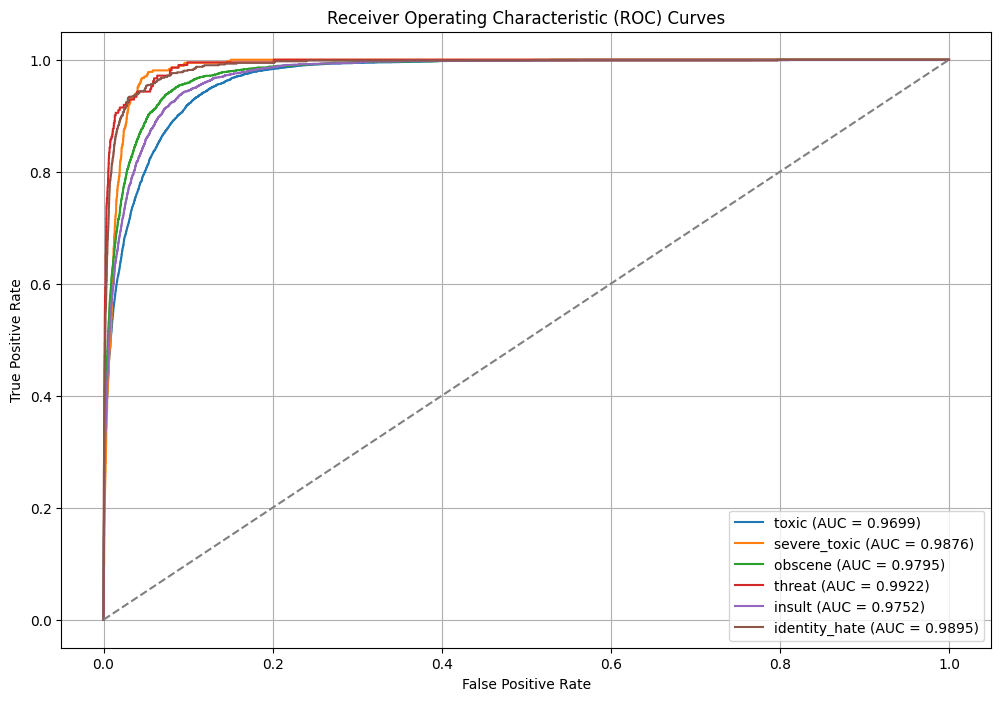

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true and y_pred are your true labels and predicted probabilities respectively
y_probs = np.array(y_pred)  # Predicted probabilities (not labels)
y_true = np.array(y_true)    # True labels (binary format, shape = [n_samples, n_labels])

# Create the ROC curves for each label
plt.figure(figsize=(12, 8))

for i, label_name in enumerate(label_names):
    try:
        # Compute ROC curve for each label
        fpr, tpr, thresholds = roc_curve(y_true[:, i], y_probs[:, i])
        auc = roc_auc_score(y_true[:, i], y_probs[:, i])

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{label_name} (AUC = {auc:.4f})')

    except:
        print(f"Skipping label {label_name} due to issues with ROC calculation.")

# Customize plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
